# Lección 2: Los postulados de la mecánica cuántica #

La mecánica cuántica es el marco teórico en el que los científicos trabajan el desarrollo de teorías físicas relacionadas con el mundo microscópico. Este marco de trabajo matemático, por si solo, no indica las leyes que un sistema debería cumplir, sin embargo, ofrece el panorama de cómo este sistema puede cambiar.


Los postulados de la mecánica cuántica son aquellos que establecen la relación entre el mundo físico y el formalismo matemático de la mecánica cuántica. 
Es importante tener en cuenta que el desarrollo de estos postulados se dio a traves del ensayo y el error, de forma tal que estos parecen partir de motivaciones no muy claras, sin embargo, nuestro objetivo en esta sesión es aprender el cómo aplicarlos y cuándo hacerlo.

----


Primero importaremos alguna librerías que son necesarias para desarrollar nuestro experimento


In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram,state_visualization
from qiskit.quantum_info.operators import Operator
import matplotlib.pyplot as plt
import numpy as np

pi=np.pi

Ahora definimos una función con un parametro $\phi$ que nos servirá para hacer una evolución temporal en una simulación de un interferómetro de Mach-Zehnder.

In [5]:
def MZ_interferometer(phi):
    # La variable phi esta relacionada al cambio de fase en uno de los dos caminos
    MZ_circuit=QuantumCircuit(1)
    
    # Se define una compuerta de Hadamard la cual cumple la función de beam splitter
    MZ_circuit.h(0)
    
    # Luego se hace una diferencia de camino a traves del uno de los caminos del campo,
    # En este caso el que esta en el estado que llamamos |1>
    
    MZ_circuit.p(phi,0)
    
    # finalmente ponemos el siguiente BS para terminar con el interferómetro
    MZ_circuit.h(0)
    
    
    MZ_gate=MZ_circuit.to_gate()
    MZ_gate.name = "MZ-Interferometer"
    
    return MZ_gate
    


### Postulado 1 ###

El primer postulado de la mecánica cuántica nos indica el espacio matemático en el que, dado un sistema, se trabaja el formalismo de la mecánica cuántica.
Éste dicta que:
Dado un sistema físico aislado hay un espacio vectorial complejo con un producto interno definido (un espacio de Hilbert) conocido como ***espacio de estados***  del sistema. El sistema en este espacio se representa a partir de un ***vector de estado***, el cual es unitario en este espacio, es decir.

$$|\psi\rangle = \sum_k c_k|k\rangle \hspace{2em} \text{donde} \hspace{2em} \langle\psi|\psi\rangle = \sum_k |c_k|^2 = 1.$$

La notación que se utiliza en la mecánica cuántica para escribir estos estados se conoce como la notación bra-ket de Dirac. En esta notación el estado bra se escribe, $\langle \psi |$ y su correspondiente ket es $|\psi\rangle$.

En el caso de la computación cuántica nosotros vamos a estar interesados en un espacio de estados particular, un espacio de en el que el sistema tiene dos estados bien definidos $|0\rangle$ y $|1\rangle$, este espacio de estados lo llamaremos el espacio de qubit. En este caso los estados $|0\rangle$ y $|1\rangle$ son la base de nuestro espacio vectorial, y dado que estos se definen ortonormales, podemos representarlos en una forma vectorial

$$|0\rangle = \begin{bmatrix}
1 \\
0
\end{bmatrix}
\hspace{2em} 
\text{y}
\hspace{2em} 
|1\rangle = \begin{bmatrix}
0 \\
1
\end{bmatrix}$$

Por lo tanto, el ket asociado a un estado arbitrario $|\psi\rangle$ se puede representar de la forma

$$ |\psi\rangle = \alpha|0\rangle + \beta|1\rangle = \begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} $$

Los coeficientes $\alpha$ y $\beta$ representan las amplitudes de los estados $|0\rangle$ y $|1\rangle$ respectivamente. Estos números Estan relacionados con las *probabilidades* de encontrar el sistema, en este caso el qubit, en un estado o el otro. Más en detalle, las probabilidades de encontrar el qubit $|\psi\rangle$ en el estado $|0\rangle$ o $|1\rangle$ después de realizar la medición son

$$p(|0\rangle) = |\alpha|^2 \hspace{2em}\text{y}\hspace{2em} p(|1\rangle) = |\beta|^2$$

Antes de continuar hagamos un pequeño experimento.

Preparemos un estado de una forma partícular, en concreto vamos a prepararlo en el estado

$$|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) $$

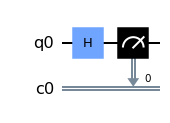

In [4]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')

De acuerdo con lo que vimos anteriormente entonces $\alpha = \beta = \frac{1}{\sqrt{2}}$. Por lo tanto, las probabilidades de que el qubit esté en los estados $|0\rangle$ o $|1\rangle$ son $p(|0\rangle) = \frac{1}{2}$ y $p(|1\rangle) = \frac{1}{2}$ respectivamente. Ahora realizamos una medición.

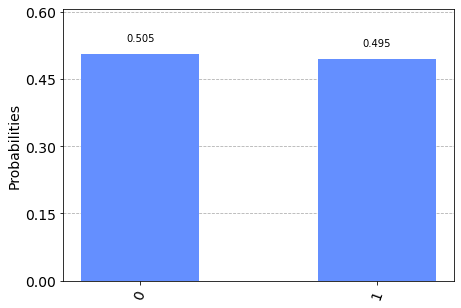

In [6]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc,backend,shots=10000).result().get_counts()
plot_histogram(results)

Lo que haremos ahora es agregar una fase de la forma $e^{i\phi}$ en la amplitud del estado $|1\rangle$. Por lo cual el estado toma la forma

$$|\psi\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + i|1\rangle\right) .$$ 


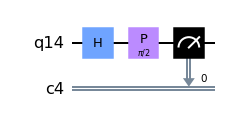

In [12]:
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)


qc.h(qr[0])
qc.p(pi/2,qr[0])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')

Midiendo nuevamente tenemos.

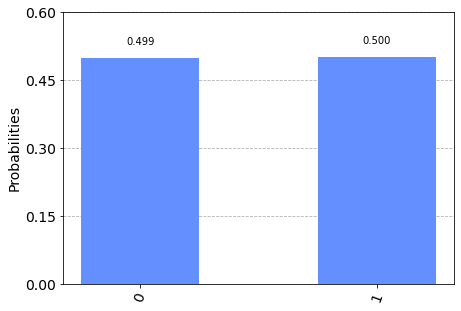

In [15]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc,backend,shots=10000).result().get_counts()
plot_histogram(results)

Es decir que, así se añadiera un factor de fase las distribuciones de probabilidad luego de medir son iguales, por lo tanto, los números $\alpha$ y $\beta$ tienen que ser números de la forma $\alpha = |\alpha|e^{i\theta_\alpha}$ y $\beta = |\beta|e^{i\theta_\beta}$, es decir, estos números pertenecen a $\mathbb{C}$. 

Con base a este resultado, podemos escribir apropiadamente el bra asociado al estado $|\psi\rangle$. Este es

$$\langle \psi | =  \alpha^* \langle 0 | + \beta^*\langle 1 | = \begin{bmatrix}
\alpha^* ,\beta^*
\end{bmatrix} $$

Estos estados cumplen con las relaciones

$$\begin{eqnarray}\langle 0|0 \rangle &=&\begin{bmatrix}
1 ,0
\end{bmatrix}\begin{bmatrix}
1 \\
0
\end{bmatrix}  &=& 1, \\
\langle 1|1\rangle &=& \begin{bmatrix}
0 ,1
\end{bmatrix}\begin{bmatrix}
0 \\
1
\end{bmatrix}  &=& 1, \\
		\langle 0|1\rangle &=& \begin{bmatrix}
1 ,0
\end{bmatrix}\begin{bmatrix}
0 \\
1
\end{bmatrix}  &=& 0, \\
        \langle 1|0\rangle &=& \begin{bmatrix}
0 ,1
\end{bmatrix}\begin{bmatrix}
1 \\
0
\end{bmatrix}  &=& 0.
\end{eqnarray}$$

Por lo cual el Bra-Ket del estado $|\psi\rangle$, el cual representa el producto punto en el espacio de estados, se escribe:

$$ \begin{eqnarray}\langle\psi|\psi\rangle &=& \left( \alpha^* \langle 0 | + \beta^*\langle 1 | \right) \left(\alpha|0\rangle + \beta|1\rangle\right)\\
&=&|\alpha|^2 + |\beta|^2 = 1\end{eqnarray} $$

O vectorialmente

$$\langle\psi|\psi\rangle =  \begin{bmatrix}
\alpha^* ,\beta^*
\end{bmatrix}\begin{bmatrix}
\alpha \\
\beta
\end{bmatrix} = |\alpha|^2 + |\beta|^2 = 1$$





Adicionalmente, así como definimos el Bra-ket podemos definir un Ket-Bra, que tendría la forma

$$|\psi\rangle\langle\psi| = \begin{bmatrix}
\alpha\alpha^*&\alpha\beta^*\\
\beta\alpha^*&\beta\beta^*
\end{bmatrix}
$$

Este tipo de producto, que es similar al producto tensorial, se conoce en este contexto como el producto de Kronecker.


Dado que los números $\alpha$ y $\beta$ son complejos entonces un sistema de dos estados, como es el caso de un qubit, puede representarse sobre la superficie de una esfera de radio $1$, esta esfera se conoce como la *Esfera de Bloch*. 
<img src="Lec_2_Postulados_files/BvsQB.png" alt="drawing" width="400"/>


--------

### Postulado 2 ###

La evolución temporal de un sistema cuántico ***cerrado*** se describe a traves de una ***transformación unitaria***. esto implica que si en un tiempo $t_{1}$ el sistema se encuentra en el estado $|\psi\rangle$. Luego, en un instante $t_2$ el sistema estará en el estado $|\psi '\rangle$. Esta evolución se da por un operador unitario $U(t_1,t_2)$, que solo depende de los dos tiempos ya mencionados. Esta evolución se puede escribir como
$$ |\psi'\rangle = U |\psi\rangle. $$

Así mismo, teniendo en mente el operador Hamiltoniano de un sistema cerrado, se puede escribir la evolución temporal de este a traves de la ecuación de Schrödinger, 
$$ i\hbar \frac{d|\psi\rangle}{dt} = \mathcal{H} |\psi\rangle $$

Como hemos visto, así como los estados tienen una representación vectorial, los operadores que actuan sobre los estados se pueden representar matricialmente para que modifiquen estos estados. En el caso de la computación cuántica cada una de las compuertas que se usan tiene una representación matricial. El primer operador que veremos es el operador identidad $\mathbb{1}$. Este operador no modifica el estado de ninguna forma, y se puede representar matricialmente como

$$\mathbb{1} =\begin{bmatrix}
		1 & 0 \\ 
		0 & 1
	\end{bmatrix} .
$$

 
Otra transformación se representa mediante el símbolo $X$, esta transformación lo que hace es intercambiar los elementos de la base, es decir

$$\begin{equation}
	X|0\rangle\rightarrow|1\rangle, \hspace{2em}	X|1\rangle\rightarrow|0\rangle.
\end{equation}$$

Matricialmente se puede representar como

$$\begin{equation}
	X=\begin{bmatrix}
	0 & 1 \\ 
	1 & 0
	\end{bmatrix}. 
\end{equation}$$

Esta transformación se llama phase-flip y se puede representar mediante el operador $Z$. esta cambia la fase relativa entre los estados  $|0\rangle$ y $|1\rangle$ en un factor de $\pi$, es decir

$$\begin{equation}
	Z|0\rangle\rightarrow|0\rangle, \hspace{2em}	Z|1\rangle\rightarrow -|1\rangle.
\end{equation} $$

Matricialmente se representa por

$$\begin{equation}
Z=\begin{bmatrix}
1 & 0 \\ 
0 & -1
\end{bmatrix} 
\end{equation}$$

Los operadores $X$ y $Z$ son dos de los conocidos operadores de Pauli, Estos se representan por las llamadas matrices de Pauli. Adicionalmente hay otra transformación que viene de la combinación entre $X$ y $Z$ de la forma $ZX$, esta actúa sobre el estado de forma tal que 

$$\begin{equation}
		ZX|0\rangle\rightarrow-|1\rangle, \hspace{2em}	ZX|1\rangle\rightarrow |0\rangle.
\end{equation} $$

Se puede representar matricialmente de la forma

$$\begin{equation}
	ZX=\begin{bmatrix}
	0 & 1 \\ 
	-1 & 0
	\end{bmatrix} = iY
\end{equation}$$

Con $Y$ La tercera matriz de Pauli. Esta tiene la forma

$$\begin{equation}
	Y=\begin{bmatrix}
	0 & -i \\ 
	i & 0
	\end{bmatrix}.
\end{equation}$$

En este punto es importante definir la operación $^\dagger$ que se realiza sobre un operador. Esta operación implica tomar el operador transpuesto y complejo conjugado, por ejemplo para el operador $Y$ tenemos

$$\begin{equation}
	Y=\begin{bmatrix}
	0 & -i \\ 
	i & 0
	\end{bmatrix}\Rightarrow Y^\dagger=\begin{bmatrix}
	0 & i \\ 
	-i & 0
	\end{bmatrix}^* = \begin{bmatrix}
	0 & -i \\ 
	i & 0
	\end{bmatrix}.
\end{equation}$$

Como vimos, $Y = Y^\dagger$, esta es una propiedad llamada *Hermiticidad*. Cuando un operador en mecánica cuántica es hermítico, entonces es posible medir los observables asociados a ese operador.

Además de los operadores de Pauli hay otro par de operadores que son importantes para futuros desarrollos. El primero es el operador de Hadamard, el cual tiene la forma


$$H =\frac{1}{\sqrt{2}} \begin{bmatrix}
1 & 1\\
1 & -1 
\end{bmatrix}$$

Esta compuerta lo que hace es rotar los estados en un ángulo de 45°. Es decir

$$|0\rangle\rightarrow \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)\hspace{2em} \text{y}\hspace{2em}|1\rangle \rightarrow \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right)$$

Un ultimo operador que nos sirve en este momento es el cambio de fase. Este operador lo que hace es añadir una fase cuando el sistema se encuentra en el estado $|1\rangle$. Matricialmente se puede representar como 

$$u_1(\phi) =\begin{bmatrix}
1 & 0\\
0 & e^{i\phi} 
\end{bmatrix}$$


Para ilustrar este principio lo que haremos será simular un interferómetro de Mach-Zehnder como el que se muestra en la siquiente figura.

<img src="Lec_2_Postulados_files/MZ-interferometer.png" alt="drawing" width="600"/>

En este caso, solo se envía un fotón por la entrada 1. El estado inicial se puede representar de la forma
$$ |\psi_i\rangle = |0\rangle$$


-----


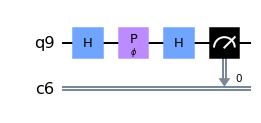

In [12]:
## Primero definiremos el fotón en el estado inicial $|0>$
qr=QuantumRegister(1)
cr=ClassicalRegister(1)
qc=QuantumCircuit(qr,cr)

# definimos el parametro
phi=Parameter('$\phi$')

# Definimos el espaciamiento deseado
angulos = np.linspace(0,2*pi,100)

## Aplicamos el interferómetro de MZ a nuestro estado inicial
MZ_I = MZ_interferometer(phi)


qc.append(MZ_I,[0])
qc.measure(qr[0],cr[0])
qc.decompose().draw(output='mpl')


Luego de pasar por el interferómetro, el estado final toma la forma

$$|\psi_f\rangle = \cos\frac{\phi}{2}|0\rangle - i\sin\frac{\phi}{2} |1\rangle$$

Por lo tanto, las probabilidades de medir el estado $|0\rangle$, es decir, que se haga una detección en el detector $D_4$  y de medir $|1\rangle$, es decir, hacer una detección en el detector $D_5$ son:

$$P_0 = \cos^2 \frac{\phi}{2} \hspace{2em} \text{y}\hspace{2em} P_1 = \sin^2 \frac{\phi}{2}$$

De acá se ve claramente que 

$$ P_0 + P_1 = \cos^2 \frac{\phi}{2} +\sin^2 \frac{\phi}{2} = 1 $$

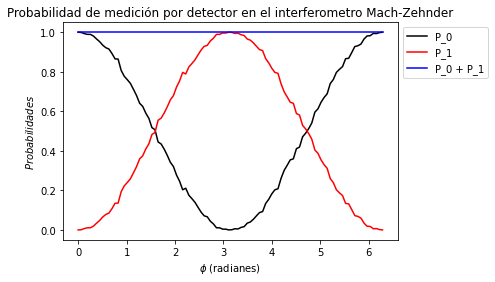

In [10]:
shots=1024
backend = Aer.get_backend('qasm_simulator')
resultados = execute(qc,backend,parameter_binds=[{phi:angulo}for angulo in angulos],shots=shots).result().get_counts()


## Capturamos la probabilidad de en el medidor 1
P_0 = np.array([resultado.get('0',0)/shots for resultado in resultados])

## Capturamos la probabilidad de en el medidor 2
P_1 = np.array([resultado.get('1',0)/shots for resultado in resultados])


## Graficamos
plt.title(r'Probabilidad de medición por detector en el interferometro Mach-Zehnder')
plt.xlabel(r'$\phi$ (radianes)')
plt.ylabel(r'$Probabilidades$')
plt.plot(angulos,P_0,label='P_0',color='k')
plt.plot(angulos,P_1,label='P_1',color='r')
plt.plot(angulos,P_0 + P_1,label='P_0 + P_1',color='b')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

### Postulado 3 ###

Las mediciones a un sistema cuántico se describen a traves de una colección ${M_{m}}$ de ***operadores de medición***. Estos operadores actuan sobre el es estacio de estados del sistema. El indice $m$ se refiere a las posibles mediciones que pueden resultar en el experimento. Es decir, si un sistema se encuentra en el estado $|\psi>$ justo antes de la medición, la probabilidad de que se de el resultado $m$ es

$$p(m) = \langle\psi|M_m^{\dagger}M_m|\psi\rangle.$$

Luego de la medición el estado del sistema colapsa al estado

$$\frac{M_m |\psi\rangle}{\sqrt{\langle\psi|M_m^{\dagger}M_m|\psi\rangle}}.$$

Es importante tener en cuenta que los operadores de medición satisfacen la relación de completez

$$\sum_m M_m^{\dagger}M_m = I .$$

Esta relación de completez muestra también el hecho de que la suma de las probabilidades de que el sistema este en el estado $m$ sea uno:

$$\sum_m p(m) = \sum_m \langle\psi|M_m^{\dagger}M_m|\psi\rangle = 1$$

En el caso de un qubit, tenemos dos operadores de medición, el que mide el estado $|0\rangle$ que llamamos $M_0$ y el que mide el estado $|1\rangle$ que llamamos $M_1$. Se representan de la forma

$$M_0=\begin{bmatrix}
		1 & 0 \\ 
		0 & 0
	\end{bmatrix} \hspace{2em} \text{y} \hspace{2em} M_1=\begin{bmatrix}
		0 & 0 \\ 
		0 & 1
	\end{bmatrix} 
$$

Entonces, por ejemplo, tomemos el estado final presentado en el caso del interferómetro de Mach-Zehnder

$$|\psi\rangle = \cos\frac{\phi}{2}|0\rangle - i\sin\frac{\phi}{2} |1\rangle
$$

Primero supongamos que al realizar la medición el estado resulta ser $|0\rangle$, entonces el estado luego de la medición es

$$\begin{eqnarray}|\psi\rangle &\rightarrow& \frac{M_0 |\psi\rangle}{\sqrt{\langle\psi|M_0^{\dagger}M_0|\psi\rangle}}\\
&=& \frac{\cos\frac{\phi}{2} |0\rangle}{\sqrt{\cos^2\frac{\phi}{2}}} = |0\rangle\end{eqnarray}
$$

De igual forma, suponiendo que al medir el estado colapsó al estado $|1\rangle$, se tiene 

$$\begin{eqnarray}|\psi\rangle &\rightarrow& \frac{M_1 |\psi\rangle}{\sqrt{\langle\psi|M_1^{\dagger}M_1|\psi\rangle}}\\
&=& \frac{\sin\frac{\phi}{2} |1\rangle}{\sqrt{\sin^2\frac{\phi}{2}}} = |1\rangle\end{eqnarray}
$$


-----

### Postulado 4 ###
El espacio de los estados de un sistema físico compuesto es el producto tensorial entre los espacios de estados de los componentes de este sistema compuesto. Esto quiere decir que, si tenemos $1,2,...,n$ sistemas que se encuentran en los estados $|\psi_1>,|\psi_2>,...,|\psi_n>$ respectivamente, entonces, la decripción de el sistema físico compuesto $|\Psi>$ sería

$$|\Psi> = |\psi_1>\otimes |\psi_2> \otimes ... \otimes |\psi_n>$$

Para ilustrar este postulado, vamos a pensar en dos sistemas de 1 qubit los cuales vamos a nombrar $|\psi_1\rangle$ y $|\psi_2\rangle$ por lo cual el sistema completo se puede ver de la forma $|\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle$. Una base para expandir estos estados es la de {$|0\rangle$, $|1\rangle$}, esta base para cada uno de los qubits, entonces, el estado total se puede expandir en la base:

$$ \{|0\rangle,|1\rangle\} \otimes \{|0\rangle,|1\rangle\} = \{|0\rangle\otimes |0\rangle, |0\rangle\otimes |1\rangle, |1\rangle\otimes |0\rangle, |1\rangle\otimes |1\rangle\} $$

Usando la notación $|0\rangle\otimes |0\rangle = |0 0\rangle$ y así para los otros sistemas, donde el primer y segundo número corresponden a los sistemas $|\psi_1\rangle$ y $|\psi_2\rangle$ respectivamente. Este producto se puede visualizar vectorialmente de la forma

$$|0 0\rangle = |0\rangle\otimes |0\rangle = \begin{bmatrix}
1\\
0
\end{bmatrix}\otimes\begin{bmatrix}
1\\
0
\end{bmatrix} = \begin{bmatrix}
1\begin{bmatrix}
1\\
0
\end{bmatrix}\\
0\begin{bmatrix}
1\\
0
\end{bmatrix}
\end{bmatrix} = \begin{bmatrix}
1\\
0\\
0\\
0
\end{bmatrix}$$

Realizando los otros productos de la base se puede llegar a 
$$ |0 0\rangle =  \begin{bmatrix}
1\\
0\\
0\\
0
\end{bmatrix},\hspace{1em}|0 1\rangle =  \begin{bmatrix}
0\\
1\\
0\\
0
\end{bmatrix},\hspace{1em}|1 0\rangle =  \begin{bmatrix}
0\\
0\\
1\\
0
\end{bmatrix},\hspace{1em}|1 1\rangle =  \begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}.$$

Sin embargo, como bien sabemos, hay infinitos conjuntos de vectores que pueden ser la base del espacio en el que estamos trabajando, del mismo modo, hay diferentes estados de dos partículas que pueden funcionar como base para el espacio de Hilbert en el que los posibles estados de estas partículas reciden. Una base de interes para la computación cuántica es la conocida *Base de Bell*. La base de Bell para dos qubits representa los posibles estados *entrelazados* que pueden haber entre ellas. Los 4 elementos de la base de Bell para 2 qubits son

$$\begin{eqnarray}
		|\Psi^+\rangle_{1,2} &=& \frac{1}{\sqrt{2}}\left(|01 \rangle + |10\rangle\right),\\
		|\Psi^-\rangle_{1,2} &=& \frac{1}{\sqrt{2}}\left(|01 \rangle - |10\rangle\right),\\
		|\Phi^+\rangle_{1,2} &=& \frac{1}{\sqrt{2}}\left(|00 \rangle + |11 \rangle\right),\\
		|\Phi^-\rangle_{1,2} &=& \frac{1}{\sqrt{2}}\left(|00 \rangle - |11 \rangle\right).
\end{eqnarray}$$

Como pueden notar, NO es posible expresar alguno de los anteriores estados de la forma $|\psi\rangle_1 \otimes |\psi\rangle_1$, es decir, no se puede expresar como el producto de estados de las partículas singulares. Este tipo de estados es único de la mecánica cuántica, y son estados en los que, una vez se haga la medición de una de las dos partículas, o uno de los dos qubits, el estado del segundo quedará totalmente determinado por el resultado de la medición hecha en el primer qubit.

Ahora vamos a cunstruir estos estados, para esto tenemos el siguiente cuadro

Estado inicial $|ij\rangle$|$\left(H_1 \otimes I_2\right)$|$|\Psi\rangle_{i,j}$|
:------------:|:---------------:|:--------------:|
$| 00 \rangle$|$\frac{1}{\sqrt{2}}\left(|00 \rangle + |10\rangle\right)$|$|\Phi^+\rangle_{1,2}$|
$| 01 \rangle$|$\frac{1}{\sqrt{2}}\left(|01 \rangle + |11\rangle\right)$|$|\Psi^+\rangle_{1,2}$|
$| 10 \rangle$|$\frac{1}{\sqrt{2}}\left(|00 \rangle - |10\rangle\right)$|$|\Phi^-\rangle_{1,2}$|
$| 11 \rangle$|$\frac{1}{\sqrt{2}}\left(|01 \rangle - |11\rangle\right)$|$|\Psi^-\rangle_{1,2}$|

$$\hspace{2em}\overset{\text{Hadamard sobre } q_1}{\longrightarrow}\hspace{2em}\overset{\text{CNOT} q_1,q_2}{\longrightarrow}$$

A continuación vamos a construir el primer estado de la base de Bell

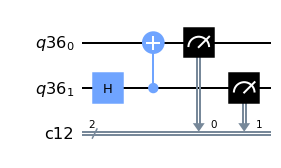

In [24]:
# Iniciamos los registros necesarios
qr=QuantumRegister(2)
cr=ClassicalRegister(2)
qc=QuantumCircuit(qr,cr)

#Ahora realizamos la operación de Hadamard sobre el primer qubit de abajo hacia arriba, es decir, el qubit[1]
qc.h(qr[1])

#Ahora aplicamos la compuerta CNOT con controlada por el primer qubit, apuntando al segundo, es decir
qc.cx(qr[1],qr[0])

qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
qc.draw(output='mpl')

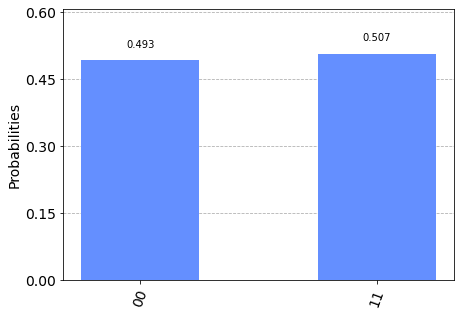

In [25]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc,backend,shots=10000).result().get_counts()
plot_histogram(results)

Como vemos, cada vez que el qubit 1 está en el estado $|i\rangle$ con $i = 0,1$, el qubit 0 siempre está en su mismo estado, tal cuál como nos indica el estado de Bell $|\Phi^+\rangle_{1,2} = \frac{1}{\sqrt{2}}\left(|00 \rangle + |11 \rangle\right)$.

## Referencias

* Nielsen & Chuang. **Quantum Computation and Quantum Information**. Cambridge University Press, 2010.
* Beck. **Quantum Mechanics Theory and Experiments**. Cambridge University Press, 2012.
* Ataman. **The quantum optical description of a double Mach-Zehnder interferometer**. arXiv:1407.1704 [physics.optics]. 2014.
* Ekert. **From Interferometers to Quantum Computers**. Supplementary material, Mathematical Institute, University of Oxford, 2010.
* Wilde. **Quantum Information Theory**. Cambridge University Press, 2013.

Muchas gracias por leer esta publicación! Abajo se encuentran links a las lecciones siguientes en el Crash Course de QC-FEM.
    